# Forward seletion timing estimation

## Load libraries

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay 
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


## Load dataset

In [27]:
combined_df = pd.read_csv("./data/Microbiota_composition.csv")
# drop the Unnamed column 
combined_df.drop(columns=['Unnamed: 0'], inplace=True)
combined_df.head()

,condition,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000083,0.000083
1,control,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,...,0.0,0.000000,0.000000,0.000788,0.0,0.00000,0.0,0.0,0.000000,0.000000
2,control,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,...,0.0,0.000000,0.000194,0.000065,0.0,0.00084,0.0,0.0,0.001808,0.000000
3,control,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000
4,control,0.000085,0.019236,0.001111,0.000256,0.000085,0.000085,0.000000,0.000000,0.000513,...,0.0,0.000171,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000


In [28]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "condition"

X = combined_df.drop(target_variable, axis = 1)
Y = combined_df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
X.head()

Separating labels from features...
...Done.

Y : 
0    control
1    control
2    control
3    control
4    control
Name: condition, dtype: object

X :


,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,0.000249,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000083,0.000083
1,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,0.000197,...,0.0,0.000000,0.000000,0.000788,0.0,0.00000,0.0,0.0,0.000000,0.000000
2,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,0.002777,...,0.0,0.000000,0.000194,0.000065,0.0,0.00084,0.0,0.0,0.001808,0.000000
3,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000
4,0.000085,0.019236,0.001111,0.000256,0.000085,0.000085,0.000000,0.000000,0.000513,0.000000,...,0.0,0.000171,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000


In [29]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
Y = Y.apply(lambda x: 1 if x == "CRC" else 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [30]:
# Preprocessing

print("Preprocessing X_train...")
print(X_train.head())
print()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array

Preprocessing X_train...
     Streptococcus_anginosus___ref_mOTU_v2_0004__  \
60                                       0.000000   
618                                      0.000000   
346                                      0.000000   
294                                      0.000036   
231                                      0.000000   

     Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
60                                      0.000815   
618                                     0.000191   
346                                     0.000138   
294                                     0.000036   
231                                     0.322280   

     Citrobacter_sp.___ref_mOTU_v2_0076__  \
60                                    0.0   
618                                   0.0   
346                                   0.0   
294                                   0.0   
231                                   0.0   

     Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
60        

In [31]:
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = scaler.transform(X_test) # don't fit again !
print("...Done!")
print(X_test[0:5,:]) # X_train is now a numpy array

Preprocessing X_test...
     Streptococcus_anginosus___ref_mOTU_v2_0004__  \
668                                      0.000043   
324                                      0.000000   
624                                      0.000236   
690                                      0.000000   
473                                      0.000000   

     Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
668                                     0.008927   
324                                     0.000326   
624                                     0.351001   
690                                     0.000078   
473                                     0.000331   

     Citrobacter_sp.___ref_mOTU_v2_0076__  \
668                              0.000000   
324                              0.000000   
624                              0.001649   
690                              0.000000   
473                              0.000000   

     Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
668        

In [32]:
# Import PCA 
from sklearn.decomposition import PCA

# Only keep features that explains 15% of the variance
pca = PCA(.15)

# Fit model to X_train
X_pca_train = pca.fit_transform(X_train)
X_pca_train[:5]
# Transform X_test
X_pca_test = pca.transform(X_test)
X_pca_test


array([[ 0.97695161, -0.98599676,  3.13204582, ..., -1.70001976,
        -0.136042  ,  1.44904418],
       [ 4.73201152, -1.68548266,  2.06920646, ...,  1.15247744,
         1.61295318, -2.34503543],
       [-4.45984367, -0.20272415,  2.09180743, ...,  1.83648558,
        -0.58030927, -1.61623508],
       ...,
       [ 0.17951678, -2.56858947, -0.63284493, ...,  0.17153854,
         0.38497392,  0.55780565],
       [ 1.54858019, -1.48711769,  3.08193113, ...,  0.71487686,
        -1.06510645,  0.43222433],
       [ 0.80541983, -3.51102265,  3.27259883, ..., -0.2218179 ,
         1.62032146,  1.18811852]])

## Classic parameters by default

#### Fit before PCA

In [33]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, Y_train)
LR_score_before_PCA_train = classifier.score(X_train, Y_train)
LR_score_before_PCA_test = classifier.score(X_test, Y_test)

#### Fit After PCA

In [34]:
# Fit LR again
classifier.fit(X_pca_train, Y_train)

# Get score
LR_score_after_PCA_train = classifier.score(X_pca_train, Y_train)
LR_score_after_PCA_test = classifier.score(X_pca_test, Y_test)

print("LR_score_before_PCA_train:", LR_score_before_PCA_train)
print("LR_score_before_PCA_test:", LR_score_before_PCA_test)
print("LR_score_after_PCA_train:", LR_score_after_PCA_train)
print("LR_score_after_PCA_test:", LR_score_after_PCA_test)

LR_score_before_PCA_train: 1.0
LR_score_before_PCA_test: 0.5974025974025974
LR_score_after_PCA_train: 0.752442996742671
LR_score_after_PCA_test: 0.6948051948051948


In [35]:
cross_val_score_before_pca_on_train = cross_val_score(classifier, X_train, Y_train, cv=5, scoring='accuracy')
cross_val_score_after_pca_on_train = cross_val_score(classifier, X_pca_train, Y_train, cv=5, scoring='accuracy') 


In [36]:
print(cross_val_score_before_pca_on_train)
print(cross_val_score_after_pca_on_train)


[0.63414634 0.67479675 0.65853659 0.64227642 0.70491803]
[0.66666667 0.69105691 0.77235772 0.75609756 0.71311475]


In [37]:
# Compute mean and std of cross-validation before PCA
mean_score_before_pca_on_train = np.mean(cross_val_score_before_pca_on_train)
std_score_before_pca_on_train = np.std(cross_val_score_before_pca_on_train)

# Compute mean and std of cross-validation after PCA
mean_score_after_pca_on_train = np.mean(cross_val_score_after_pca_on_train)
std_score_after_pca_on_train = np.std(cross_val_score_after_pca_on_train)

print("Moyenne des scores avant PCA sur le train:", mean_score_before_pca_on_train)
print("Écart type des scores avant PCA sur le train:", std_score_before_pca_on_train)
print("Moyenne des scores après PCA sur le train:", mean_score_after_pca_on_train)
print("Écart type des scores après PCA sur le train:", std_score_after_pca_on_train)



Moyenne des scores avant PCA sur le train: 0.6629348260695723
Écart type des scores avant PCA sur le train: 0.025211845754382137
Moyenne des scores après PCA sur le train: 0.7198587231773956
Écart type des scores après PCA sur le train: 0.03943049279998997


## Tuning hyperparameters

In [54]:
def hyperparam_tuning(classifier, params, cv,X_train,Y_train, X_test, Y_test):
    gridsearch = GridSearchCV(classifier, param_grid = params, cv = cv) # cv : the number of folds to be used for CV
    gridsearch.fit(X_train, Y_train)
    print("...Done.")
    print("Best hyperparameters : ", gridsearch.best_params_)
    print("Best validation accuracy : ", gridsearch.best_score_)# Obtenir le meilleur modèle
    best_classifier = gridsearch.best_estimator_
    print("Best classifier  : ", best_classifier)

    # Calculer les scores de cross-validation avec le meilleur modèle
    cross_val_scores = cross_val_score(best_classifier, X_train, Y_train, cv=5, scoring='accuracy')
    print(print("Best classifier  : ", cross_val_scores))

    # mean std of cross val score
    print("Mean CV accuracy on train:", np.mean(cross_val_scores))
    print("Std CV accuracy on train:", np.std(cross_val_scores))


    # Predictions on training set
    print("Predictions on training set...")
    Y_train_pred = gridsearch.predict(X_train)
    print("...Done.")
    print(Y_train_pred)
    print()

    # It's also possible to get the probabilities estimated by the model:
    print("Probabilities on training set...")
    Y_train_proba = gridsearch.predict_proba(X_train)
    print("...Done.")
    print(Y_train_proba)
    print()

    # Predictions on test set
    print("Predictions on test set...")
    Y_test_pred = gridsearch.predict(X_test)
    print("...Done.")
    print(Y_test_pred)
    print()

    # It's also possible to get the probabilities estimated by the model:
    print("Probabilities on test set...")
    Y_test_proba = gridsearch.predict_proba(X_test)
    print("...Done.")
    print(Y_test_proba)
    print()

    # Print scores
    print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
    print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
    print()
    # Visualize confusion matrices
    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(best_classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
    plt.show()

    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(best_classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
    plt.show()


#### Before PCA

...Done.
Best hyperparameters :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best validation accuracy :  0.6873383979741436
Best classifier  :  LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')
Best classifier  :  [0.68292683 0.61463415 0.70588235]
None
Mean CV accuracy on train: 0.6678144428503109
Std CV accuracy on train: 0.038754328526852184
Predictions on training set...
...Done.
[1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0
 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 

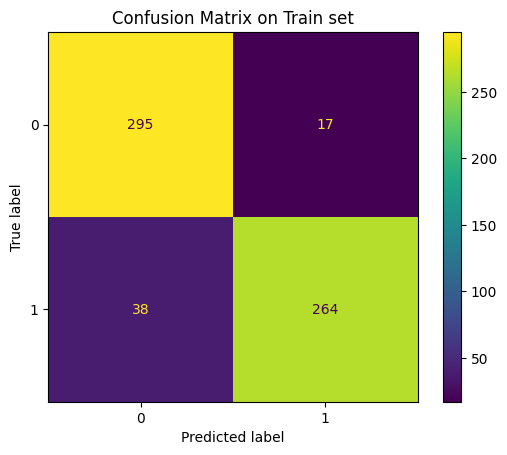

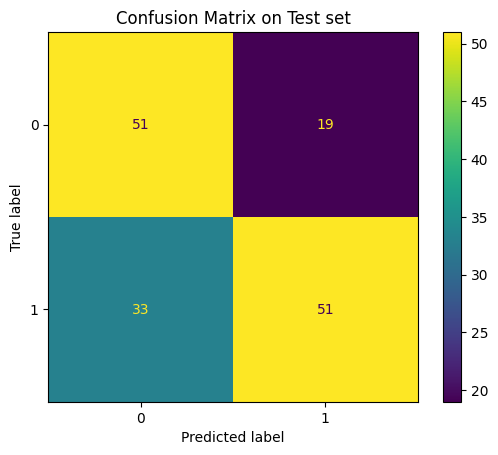

In [55]:
# Grid of values to be tested
params = {
    'penalty': ['l1', 'l2'],  # Termes de régularisation l1 et l2
    'C': [0.1, 1.0, 10.0],    # Paramètre de régularisation inverse
    # 'fit_intercept': [True, False],  # Terme d'interception
    'solver': ['liblinear'],  # Algorithmes de résolution
    'max_iter': [100, 200, 300],  # Nombre maximal d'itérations
    # 'multi_class': ['auto', 'ovr', 'multinomial'],  # Stratégies pour la classification multi-classe
    # 'warm_start': [True, False],  # Réutiliser la solution précédente
}
hyperparam_tuning(classifier, params, 5, X_train, Y_train, X_test, Y_test)

#### After PCA

...Done.
Best hyperparameters :  {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best validation accuracy :  0.7279888044782088
Best classifier  :  LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
Best classifier  :  [0.70243902 0.74146341 0.73039216]
None
Mean CV accuracy on train: 0.7247648652957118
Std CV accuracy on train: 0.016421034605294125
Predictions on training set...
...Done.
[1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1
 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1

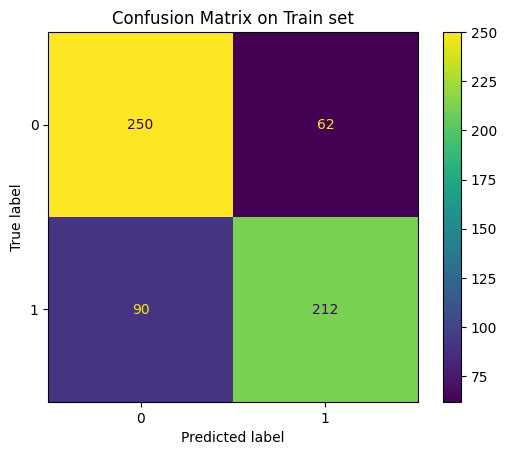

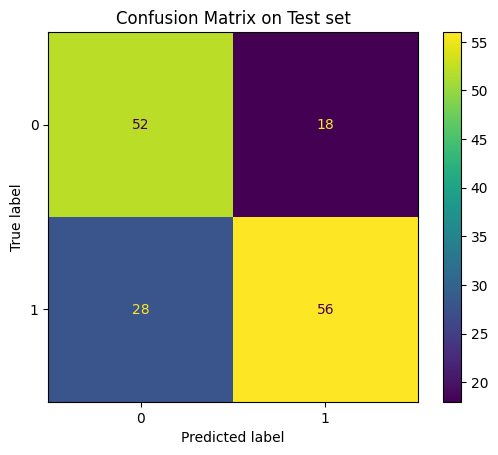

In [56]:
# Grid of values to be tested
params = {
    'penalty': ['l1', 'l2'],  # Termes de régularisation l1 et l2
    'C': [0.1, 1.0, 10.0],    # Paramètre de régularisation inverse
    # 'fit_intercept': [True, False],  # Terme d'interception
    'solver': ['liblinear'],  # Algorithmes de résolution
    'max_iter': [100, 200, 300],  # Nombre maximal d'itérations
    # 'multi_class': ['auto', 'ovr', 'multinomial'],  # Stratégies pour la classification multi-classe
    # 'warm_start': [True, False],  # Réutiliser la solution précédente
}

hyperparam_tuning(classifier, params, 5, X_pca_train, Y_train, X_pca_test, Y_test)